# Homework 2 
## Stochastic Processes in Biology

Zhao Zheng

PS ID # 1801367

1. A stochastic Lotka-Volterra (predator-prey) model is given by the following equations for the abundance of two species, $Y_1$ and $Y_2$,

$$ Y_1 \longrightarrow c_1 2Y_1 $$
$$ Y_1 + Y_2 \longrightarrow c_2 2Y_2 $$
$$ Y2 \longrightarrow c_3 \emptyset $$

(1) Explain why this is called a predator-prey model. What is the corresponding ODE model? Given this interpretation, explain whether species 1 or species 2 can exist in isolation, in the absence of the other species.

(2) Use the Gillespie algorithm to simulate trajectories from the model. Use $c_1$ = 1, $c_2$ = 0.005, $c_3$ = 0.6.

(3) Changing which parameter will make it more likely for species 1 to go extinct? What about species 2? Change these parameters gradually to verify your hypothesis in simulations.


(1) Y is the prey species and X is the predator species. The reason that these equations can denote the predator-prey model is that they can describe the birth and death of prey and predator behaviors. Y is the prey species and X is the predator species. The first equation means the spontaneous reproduction of prey Y. The second equation means consumption of a prey Y to generate the next generation X. The third equation denotes the death of predator X. 
Assume there is no environmental carrying capacity limit, if species 1 can exist in isolation, the number of the species 1 will grow exponentially, in pure birth model. If species 2 can exist in isolation, it will not survive

(2)
$$ \frac{dY_1}{dt} = c_1 Y_1 - c_2 Y_1 Y_2 $$

$$ \frac{dY_2}{dt} = c_2 Y_1 Y_2 - c_3 Y_2 $$

In [1]:
import numpy as np
from sympy import *
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def rxn_index(probs):
    q = np.random.rand()
    i=0
    p_sum = 0.0
    while p_sum < q:
        p_sum += probs[i]
        i +=1
    return i -1 

def Lotka_Volterra_ssa(y, T, c1, c2, c3):
    a = np.zeros(4)
    t_y = [0]
    i = 0
    
    v = np.array([[1,0],[-1,0],[0,1],[0,-1]])
    while t_y[i]<T:
        
        # propensities of the reaction
        a = np.array([c1*y[i,0],c2*y[i,0]*y[i,1],c2*y[i,0]*y[i,1],c3*y[i,1]])
        
        # sum the rate
        a_sum = np.sum(a)
        a_cumsum = np.cumsum(a,axis=0)
        
        dt = np.random.exponential(1/a_sum)
        prob = a /  a_sum
        
        j = rxn_index(prob)
        
        y = np.append(y, [y[i,:]+v[j,:]],axis=0)
        t_y = np.append(t_y, [t_y[i]+dt])
        i+=1
    return y,t_y

def plot_traj(y, t_y):
    plt.plot(t_y, y[:,0], lineWidth=2, color='C0')
    plt.plot(t_y, y[:,1], lineWidth=2, color='C1')
    plt.legend(['Y1', 'Y2'])
    plt.xlabel("time")
    plt.xticks(np.arange(0,T, step = 20))
    plt.ylabel('number of population')
    plt.show()

C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


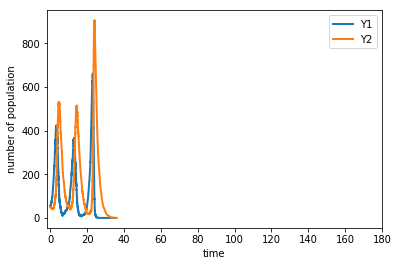

In [23]:
c1 = 1
c2 = 0.005
c3 = 0.6
T = 200

# initial Y1 and Y2 numbers
y0 = np.array([[50,50]])
y, t_y = Lotka_Volterra_ssa(y0, T, c1, c2, c3)
plot_traj(y, t_y)

(3) Decreasing c1 and increasing c2 will make it more likely for species 1 to go extinct, decreasing c2 and increasing c3 will make species 2 to go extinct. Change these parameters gradually to verify your hypothesis in simulations.

In [3]:
c1_params = np.arange(0.7,2.1,0.1)
c2 = 0.005
c3 = 0.6

T = 200
y0 = np.array([[50,50]])

y1_t = np.zeros(len(c1_params))
y2_t = np.zeros(len(c1_params))
for i, c1 in enumerate(c1_params):
    y, t_y = Lotka_Volterra_ssa(y0, T, c1, c2, c3)
    y1_ex = 0
    y2_ex = 0
    for k in range(0,len(y)):
        if y[k,0] == 0 and y[k+1,0] == 0:
            y1_ex = round(t_y[k],3)
            break
    y1_ex = round(y1_ex, 3)
    y1_t[i] = y1_ex
    for n in range(0,len(y)):
        if y[n,1] == 0 and y[n+1,1] == 0:
            y2_ex = t_y[n]
            break
    y2_ex = round(y2_ex, 3)
    y2_t[i] = y2_ex


C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'Y2 Population vs c1')

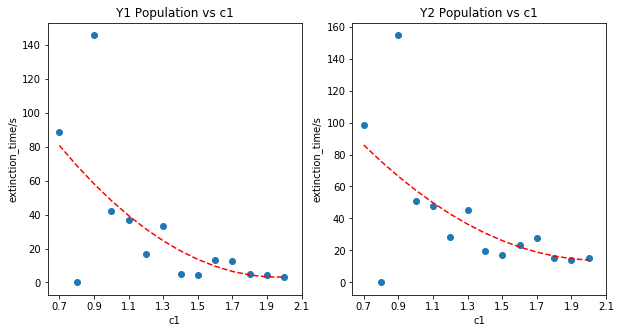

In [152]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(c1_params, y1_t,'o')
z = np.polyfit(c1_params,y1_t,2)
p = np.poly1d(z)
plt.plot(c1_params,p(c1_params),'r--')
plt.xticks(np.arange(0.7,2.2, step = 0.2))
plt.xlabel('c1')
plt.ylabel('extinction_time/s')
plt.title('Y1 Population vs c1')

plt.subplot(1,2,2)
plt.plot(c1_params, y2_t,'o')
z = np.polyfit(c1_params,y2_t,2)
p = np.poly1d(z)
plt.plot(c1_params,p(c1_params),'r--')
plt.xticks(np.arange(0.7,2.2, step = 0.2))
plt.xlabel('c1')
plt.ylabel('extinction_time/s')
plt.title('Y2 Population vs c1')

In [109]:
c1 = 1
c2_params = np.arange(0.001,0.01,0.001)
c3 = 0.6

T = 200
y0 = np.array([[50,50]])

y1_t = np.zeros(len(c2_params))
y2_t = np.zeros(len(c2_params))
for i, c2 in enumerate(c2_params):
    y, t_y = Lotka_Volterra_ssa(y0, T, c1, c2, c3)
    y1_ex = 0
    y2_ex = 0
    for k in range(0,len(y)):
        if y[k,0] == 0 and y[k+1,0] == 0:
            y1_ex = round(t_y[k],3)
            break
    y1_ex = round(y1_ex, 3)
    y1_t[i] = y1_ex
    for n in range(0,len(y)):
        if y[n,1] == 0 and y[n+1,1] == 0:
            y2_ex = t_y[n]
            break
    y2_ex = round(y2_ex, 3)
    y2_t[i] = y2_ex
    


C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'Y2 Population vs c2')

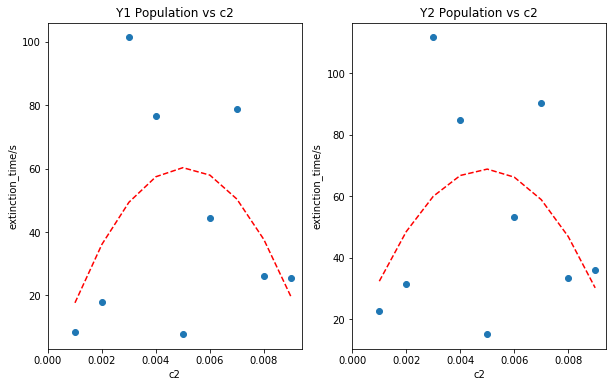

In [110]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
plt.plot(c2_params, y1_t,'o')
z = np.polyfit(c2_params,y1_t,2)
p = np.poly1d(z)
plt.plot(c2_params,p(c2_params),'r--')
plt.xlabel('c2')
plt.xticks(np.arange(0,0.01, step = 0.002))
plt.ylabel('extinction_time/s')
plt.title('Y1 Population vs c2')

plt.subplot(1,2,2)
plt.plot(c2_params, y2_t,'o')
z = np.polyfit(c2_params,y2_t,2)
p = np.poly1d(z)
plt.plot(c2_params,p(c2_params),'r--')
plt.xticks(np.arange(0,0.01, step = 0.002))
plt.xlabel('c2')
plt.ylabel('extinction_time/s')
plt.title('Y2 Population vs c2')

C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'Y2 Population vs c3')

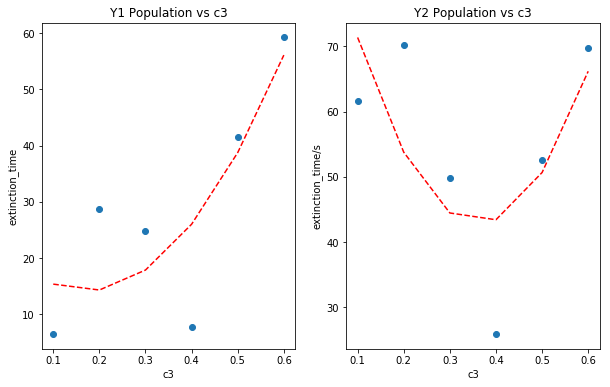

In [150]:
c1 = 1
c2 = 0.005
c3_params = np.arange(0.1,0.7,0.1)

T = 200
y0 = np.array([[50,50]])

y1_t = np.zeros(len(c3_params))
y2_t = np.zeros(len(c3_params))
for i, c3 in enumerate(c3_params):
    y, t_y = Lotka_Volterra_ssa(y0, T, c1, c2, c3)
    y1_ex = 0
    y2_ex = 0
    for k in range(0,len(y)):
        if y[k,0] == 0 :
            y1_ex = round(t_y[k],3)
            break
    y1_ex = round(y1_ex, 3)
    y1_t[i] = y1_ex
    for n in range(0,len(y)):
        if y[n,1] == 0 :
            y2_ex = t_y[n]
            break
    y2_ex = round(y2_ex, 3)
    y2_t[i] = y2_ex
    
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
plt.plot(c3_params, y1_t,'o')
z = np.polyfit(c3_params,y1_t,2)
p = np.poly1d(z)
plt.plot(c3_params,p(c3_params),'r--')
plt.xlabel('c3')
plt.xticks(c3_params)
plt.ylabel('extinction_time')
plt.title('Y1 Population vs c3')

plt.subplot(1,2,2)
plt.plot(c3_params, y2_t,'o')
z = np.polyfit(c3_params,y2_t,2)
p = np.poly1d(z)
plt.plot(c3_params,p(c3_params),'r--')
plt.xticks(c3_params)
plt.xlabel('c3')
plt.ylabel('extinction_time/s')
plt.title('Y2 Population vs c3')

2. Consider the following chemical reaction
    $$ A \longrightarrow X \longrightarrow \emptyset $$
    $$ B \longrightarrow Y \longrightarrow \emptyset $$
    $$ X+Y \longrightarrow C $$
    
The deterministic set of equations describing this reaction has the form
$$ \frac{d[X]}{dt} = k - \alpha_1 [X] - k_a[X][Y] $$
$$ \frac{d[Y]}{dt} = k - \alpha_2 [Y] - k_a[X][Y] $$

(1) Find the fixed points of the deterministic system. Show that for the values.

case 1:
$$ k=10 \alpha_1=10^{-6}   \alpha_2=10^{-5}   k_a=10^{-5}$$
case 2:
$$ k = 10^{3}  \alpha_1=10^{-4}   \alpha_2=10^{-3}   k_a=10^{-3}$$

Run the Gillespie algorithm and show that the behavior is very different in the two cases. Compare the stationary distributions in the two cases.

Can you give an argument why the behavior in the two cases is so different?

In [39]:
# fix points


def fix_points(k, a1, a2, ka):
    x = Symbol('x')
    y = Symbol('y')
    value = solve([k-a1*x-ka*x*y, k-a2*y-ka*x*y],[x,y])
    return value

In [41]:
#case 1:
k_1 =10
a1_1 = 10**(-6)
a2_1 = 10**(-5)
ka_1 = 10**(-5)

r_1 = fix_points(k_1,a1_1,a2_1,ka_1)
print(r_1)

[(-3162.77769969685, -316.277769969685), (3161.77769969685, 316.177769969685)]


In [42]:
#case2:
k_2 =10**3
a1_2 = 10**(-4)
a2_2 = 10**(-3)
ka_2 = 10**(-3)

r_2 = fix_points(k_2,a1_2,a2_2,ka_2)
print(r_2)

[(-3162.77769969685, -316.277769969685), (3161.77769969685, 316.177769969685)]


In [5]:
def rxn_ssa(y, T, k, a1, a2, ka):
    t_y = [0]
    i = 0
    
    v = np.array([[1,0],[-1,0],[0,1],[0,-1]])
    while t_y[i]<T:
        
        # rates of the reaction
        a = np.array([k,(a1*y[i,0]+ka*y[i,0]*y[i,1]),k,(a2*y[i,0]+ka*y[i,0]*y[i,1])])
        
        # sum the rate
        a_sum = np.sum(a)
        a_cumsum = np.cumsum(a,axis=0)
        
        dt = np.random.exponential(1/a_sum)
        prob = a /  a_sum
        
        j = rxn_index(prob)
        
        y = np.append(y, [y[i,:]+v[j,:]],axis=0)
        t_y = np.append(t_y, [t_y[i]+dt])
        i+=1
    return y,t_y
def plot_traj_rxn(y, t_y):
    plt.plot(t_y, y[:,0], lineWidth=2, color='C0')
    plt.plot(t_y, y[:,1], lineWidth=2, color='C1')
    plt.legend(['X', 'Y'])
    plt.xlabel("time")
    plt.ylabel('number of population')
    plt.show()

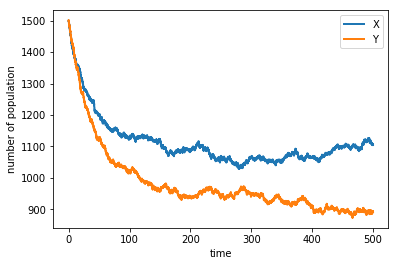

In [49]:
#case1:
k =10
a1 = 10**(-6)
a2 = 10**(-5)
ka = 10**(-5)
T = 500

# initial X and Y numbers
y0 = np.array([[1500,1500]])
y, t_y = rxn_ssa(y0, T, k, a1, a2, ka)
plot_traj_rxn(y, t_y)

In [51]:
num=[]
station_X=[]
station_Y=[]
for i,t in enumerate(t_y):
    if t> 200:
        station_X.append(y[i,0])
        station_Y.append(y[i,1])
mean_X = np.mean(station_X)
mean_Y = np.mean(station_Y)
print(mean_X, mean_Y, mean_X/mean_Y)

1074.1754210438553 925.7036018009004 1.1603880755720426


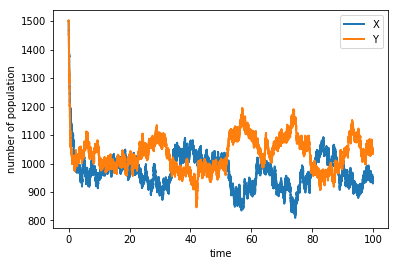

In [6]:
#case2:
k =10**3
a1 = 10**(-4)
a2 = 10**(-3)
ka = 10**(-3)
T = 100

# initial X and Y numbers
y0 = np.array([[1500,1500]])
y, t_y = rxn_ssa(y0, T, k, a1, a2, ka)
plot_traj_rxn(y, t_y)

In [8]:
num=[]
station_X=[]
station_Y=[]
for i,t in enumerate(t_y):
    if t> 20:
        station_X.append(y[i,0])
        station_Y.append(y[i,1])
mean_X = np.mean(station_X)
mean_Y = np.mean(station_Y)
print(mean_X, mean_Y, mean_X/mean_Y)

964.7368942105296 1036.182384869551 0.9310493097525336


3.Consider a gene whose product regulates its own transcription(autoregulation). The deterministic set of equations describing mRNA (r) and and protein (p) expression level are given by:

$$ \frac{dr}{dt} = k_l + \emptyset (p) - \gamma_r r$$

$$\frac{dp}{dt} = rk_p - \gamma_p p$$

where $\emptyset(p)$ is a function that describe how the rate of mRNA transcription depends on the protein concentration p.

Write down the transition matrix for the Markov process describing this system
Consider the case of positive autoregulation:

$$ \emptyset (p) = \frac {k_0 (p/k)^n}{1+(p/k)^n} $$


Setting kl = 0, γp = γr = kp = k0 = 1 and K = 0.5 in Eq. 1 above, determine the
number of fixed points for n = 1 and n = 10. Determine the stability of the fixed points.

Consider the case of negative autoregulation

$$ \emptyset (p) = \frac {k_0}{1+(p/k)^n} $$

Use the Gillespie algorithm to find and plot the stationary distribution of protein for the stochastic process you wrote down above. Use transition rates $k_l = 0.001s^{−1}, k_r = 0.01s^{−1}, k_p = 0.17s^{−1},k_0 = 0.01s^{−1}, γ_p = 0.00028s^{−1}, γ_r = 0.0083s^{−1}$ with n = 10. Do this for the case of (i) strong regulation, K = 100 and (ii) weak regulation,
K = 10000. Calculate the ratio of the standard deviation to the mean of the distribution for both cases.

In [12]:
#positive regulation
#n=1 fix point
kl = 0
k = 0.5
gamma_r = gamma_p = kp = k0 = 1
n = 1

r = Symbol('r')
p = Symbol('p')
posi_reg = k0*(p/k)**n/(1+(p/k)**n)
value = solve([kl+posi_reg-gamma_r*r, r*kp-gamma_p*p],[r,p])
print('n=1', 'fix points = ',value)

#n=10 fix point
n = 10
kl = 0
k = 0.5
gamma_r = gamma_p = kp = k0 = 1
n = 10

r = Symbol('r')
p = Symbol('p')
posi_reg = k0*(p/k)**n/(1+(p/k)**n)
value = solve([kl+posi_reg-gamma_r*r, r*kp-gamma_p*p],[r,p])
print('n=10', 'fix points = ',value)

n=1 fix points =  [(0.0, 0.0), (0.500000000000000, 0.500000000000000)]
n=10 fix points =  [(0.0, 0.0), (0.500000000000000, 0.500000000000000)]


In [232]:

def positive_reg(y, T, kl, kr, kp, k0, gamma_p, gamma_r, n):
    
    t = [0]
    i = 0
    
    v = np.array([[1,0],[-1,0],[0,1],[0,-1]])
    while t[i] < T:
        #r = y[i,0]
        #p = y[i,1]
        autoreg = k0*(y[i,1]/k)**n/(1+(y[i,1]/k)**n)
        a = np.array([kl+autoreg, gamma_r*y[i,0], y[i,0]*kp, gamma_p*y[i,1]])
        
        a_sum = np.sum(a)
        a_cumsum = np.cumsum(a,axis=0)
        
        dt = np.random.exponential(1/a_sum)
        prob = a / a_sum
        
        j = rxn_index(prob)
        y = np.append(y,[y[i,:]+v[j,:]],axis=0)
        t = np.append(t, [t[i]+dt])
        i+=1
    return y, t

In [17]:
def plot_regtraj(y, t_y):
    plt.plot(t_y, y[:,0], lineWidth=2, color='C0')
    plt.plot(t_y, y[:,1], lineWidth=2, color='C1')
    plt.xticks(np.arange(0,T,50))
    plt.legend(['r', 'p'])
    plt.xlabel("time")
    plt.ylabel('number of molecule')
    plt.show()

C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


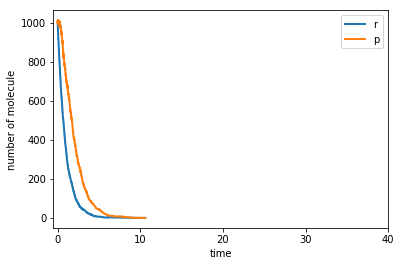

In [228]:
#positive  autoregulation
#n=1
kl = 0
k = 0.5
gamma_r = gamma_p = kp = k0 = 1
n = 1

y0 = np.array([[1000,1000]])
T = 100

y, t = positive_reg(y0, T, kl, kr, kp, k0, gamma_p, gamma_r, n)
plot_regtraj(y, t)

C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Anino\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


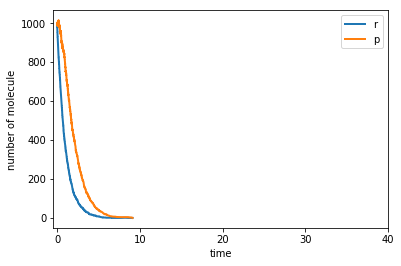

In [229]:
#positive  autoregulation
#n=10
kl = 0
k = 0.5
gamma_r = gamma_p = kp = k0 = 1
n = 10

y0 = np.array([[1000,1000]])
T = 100

y, t = positive_reg(y0, T, kl, kr, kp, k0, gamma_p, gamma_r, n)
plot_regtraj(y, t)

[0,0] the system has reached the stability

[0.5,0.5] the system has reached the stability

in both cases

In [15]:
def negtive_reg(y, T, kl, kr, kp, k0, gamma_p, gamma_r, n, k):
    
    t = [0]
    i = 0
    
    v = np.array([[1,0],[-1,0],[0,1],[0,-1]])
    while t[i] < T:
        #r = y[i,0]
        #p = y[i,1]
        autoreg = k0/(1+(y[i,1]/k)**n)
        a = np.array([kl+autoreg, gamma_r*y[i,0], y[i,0]*kp, gamma_p*y[i,1]])
        
        a_sum = np.sum(a)
        a_cumsum = np.cumsum(a,axis=0)
        
        dt = np.random.exponential(1/a_sum)
        prob = a / a_sum
        
        j = rxn_index(prob)
        y = np.append(y,[y[i,:]+v[j,:]],axis=0)
        t = np.append(t, [t[i]+dt])
        i+=1
    return y, t

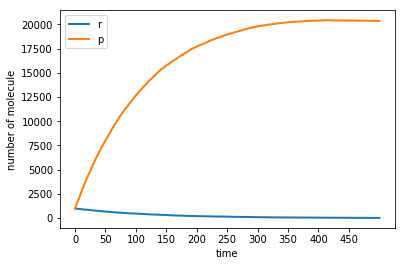

In [25]:
#strong regulation
#k = 100

kl = 0.001
kr = 0.01
kp = 0.17
k0 = 0.01
gamma_p = 0.00028
gamma_r = 0.0083
k = 100

y0 = np.array([[1000,1000]])
T = 500

y, t = negtive_reg(y0, T, kl, kr, kp, k0, gamma_p, gamma_r, n, k)
plot_regtraj(y, t)

In [26]:
# std of strong regulation
protein = y[:,1]
stable_p = []
for i,time in enumerate(t):
    if time > 350:
        stable_p.append(protein[i])
print('The standard deviation of Protein is ', round(np.std(stable_p),3))

The standard deviation of Protein is  52.308


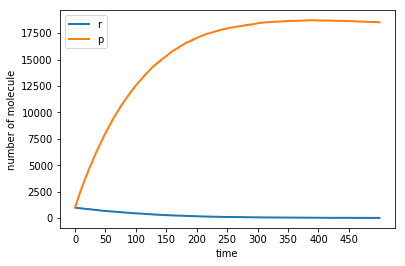

In [28]:
#weak regulation
#k=10000

kl = 0.001
kr = 0.01
kp = 0.17
k0 = 0.01
gamma_p = 0.00028
gamma_r = 0.0083
k = 10000

y0 = np.array([[1000,1000]])
T = 500

y, t = negtive_reg(y0, T, kl, kr, kp, k0, gamma_p, gamma_r, n, k)
plot_regtraj(y, t)

In [29]:
# std of strong regulation
protein = y[:,1]
stable_p = []
for i,time in enumerate(t):
    if time > 350:
        stable_p.append(protein[i])
print('The standard deviation of Protein is ', round(np.std(stable_p),3))

The standard deviation of Protein is  47.424
